## Example usage

In [1]:
from skimage.data import human_mitosis
import numpy as np
from cellstate_pred.image_utils import OperaImage
from cellstate_pred.feature_extraction import extract_features
import pandas as pd

/home/ariadna/github/cellstate-pred/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img = OperaImage()
img.image = human_mitosis()

In [3]:
opera_image = OperaImage(image=human_mitosis())
    
df =  extract_features(opera_image, 
                        model_name="facebook/dinov3-vits16-pretrain-lvd1689m",
                        batch_size=64)


Device set to use cuda:0
Map: 100%|██████████| 286/286 [00:02<00:00, 103.17 examples/s]


Dataframe with DINO features

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.497967,-0.048654,-0.242610,0.096114,-0.031796,-0.277766,-0.350720,0.048306,-0.254096,-0.016665,...,-0.549210,0.277217,0.952526,0.367471,0.275399,-0.279350,-0.211300,-0.314703,0.120752,-0.134440
1,-0.518014,-0.111734,-0.243551,0.049184,-0.093277,-0.398273,-0.295205,0.067355,-0.231070,-0.128469,...,-0.553010,0.211459,0.532170,0.360587,0.128538,-0.512478,-0.170768,-0.306276,0.456390,0.063603
2,-0.549993,-0.313850,-0.266467,-0.117023,-0.214691,-0.252751,-0.195101,-0.032531,-0.485935,-0.197251,...,-0.350026,0.127658,0.840455,0.171950,0.186995,-0.463177,0.303790,-0.359907,0.122697,-0.246667
3,-0.710879,-0.319197,-0.344438,0.139226,-0.069431,-0.270204,-0.370660,-0.063377,-0.332453,-0.097562,...,-0.547303,0.241850,0.997237,0.407728,0.375338,-0.336449,0.242660,-0.282938,0.060882,-0.188299
4,-0.501227,-0.117825,-0.264993,0.106258,-0.061863,-0.429913,-0.256585,0.072811,-0.212282,-0.149863,...,-0.578689,0.321885,0.891779,0.323146,0.108778,-0.475009,-0.089450,-0.283090,0.265550,0.037760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.307432,-0.195933,-0.519241,0.171789,-0.113249,-0.294848,-0.689833,-0.212987,-0.185577,0.136297,...,-0.489958,0.565143,0.705502,0.417610,0.136293,-0.151288,-0.098804,-0.238178,0.208817,-0.175579
282,-0.339866,-0.359855,-0.252982,-0.191730,-0.096096,-0.476247,-0.147300,-0.003220,-0.221204,0.196802,...,-0.427028,0.318069,0.880933,0.365326,0.052268,-0.334561,0.123021,-0.235767,0.318265,0.034953
283,-0.481254,-0.210558,-0.237164,0.124384,-0.092566,-0.256190,-0.394877,0.039939,-0.199182,-0.106389,...,-0.669469,0.226578,0.780189,0.409356,0.234460,-0.322919,-0.194810,-0.359871,0.211363,-0.033270
284,-0.227555,0.039263,-0.185820,-0.414681,0.022416,-0.319060,-0.151422,0.041671,-0.140374,-0.027138,...,-0.499720,0.017276,1.002891,0.104221,0.023807,-0.281172,-0.102811,-0.213134,0.024689,-0.051234


We can visualize the features in a UMAP plot

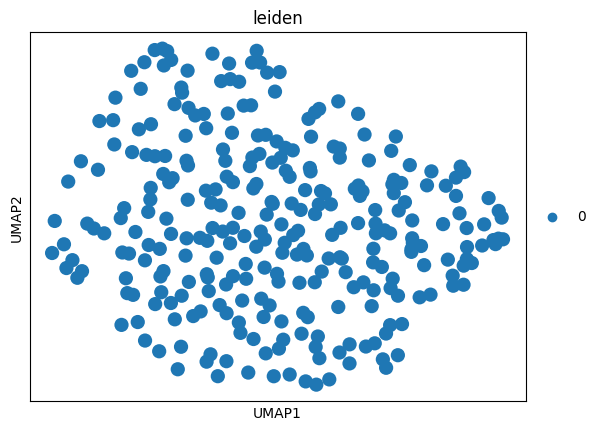

In [ ]:
import scanpy as sc
adata = sc.AnnData(df.to_numpy())

# Standard Scanpy pipeline
sc.pp.scale(adata)               # optional: z-score features
sc.pp.pca(adata, n_comps=50)     # PCA first
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)  
sc.tl.umap(adata)                # run UMAP
sc.tl.leiden(adata, flavor="igraph", resolution=0.2)

sc.pl.umap(adata, color="leiden")